<a href="https://colab.research.google.com/github/AnjaliBiju/Machine-Learning-Colab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING**

Cross Validation and Bias Variance Trade Off

*   A low variance, low bias model is a really good prediction model
*   a low bias, high variance model will be very close to the target but will be scattered all over the place

Logistic Regression

Sigmoid Function:

*   fi(z)=1/(1+ (e^-z) )

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import files   #to upload files manually
uploaded=files.upload()

Saving train.csv to train.csv


In [8]:
train= pd.read_csv('train.csv')

In [ ]:
train.head()    #SibSp indicates the number of siblings or spouses overboard

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#to see the missing data
train.isnull()    #True shows where the missing data is

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

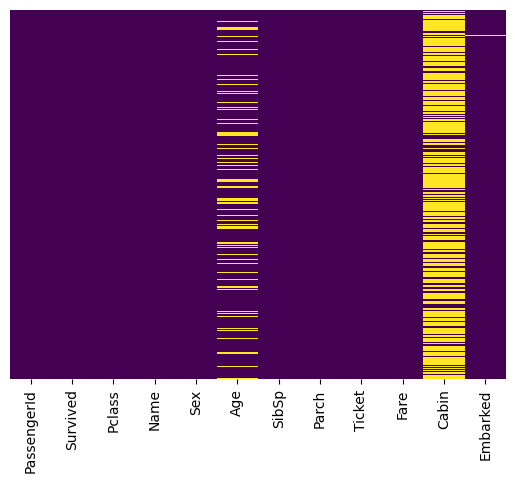

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
#yticklabels=False.. dont show the y axis labels to avoid cluttering
#cbar=False.. dont show the color bar which normally indicates the scale of the heatmap
#bright lines indicate missing values!

The cabin data indicates that too much of data is actually missing in Cabin column to do something with it

In [ ]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

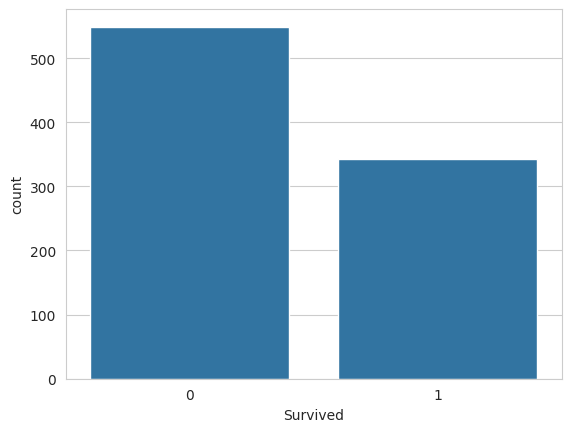

In [ ]:
#to see the number of people who survived
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

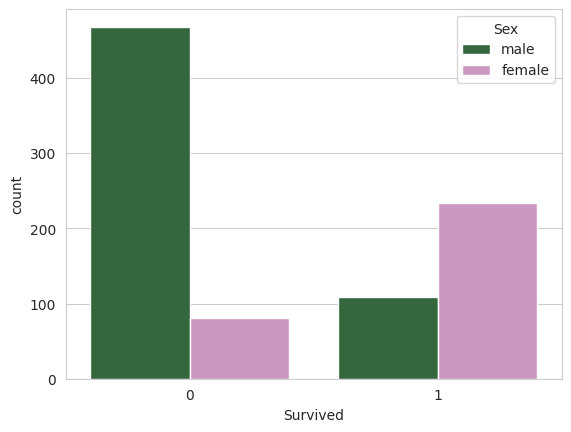

In [ ]:
#to get the count of people who survived (discriminating sex)
sns.countplot(x='Survived',data=train,hue='Sex',palette='cubehelix')

<Axes: xlabel='Survived', ylabel='count'>

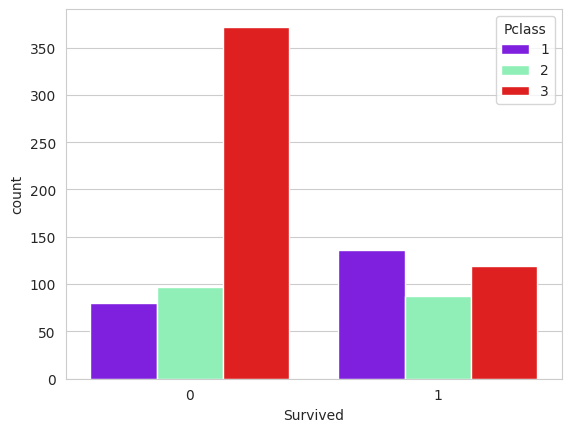

In [ ]:
#get the count of people who survived based on the Passenger Class they were travelling in
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

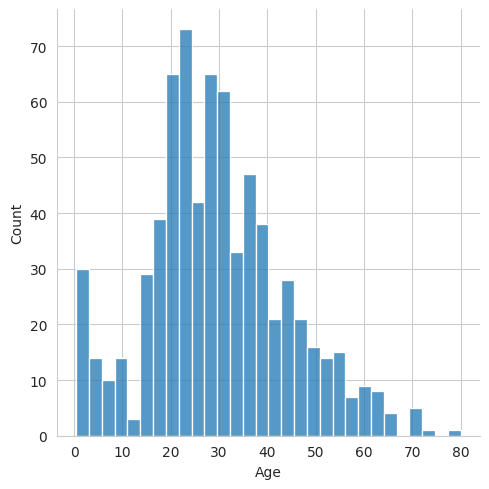

In [ ]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)
#dropna() removes any rows where Age is Nan, ie missing
#kde=Flase, dont show the curve
#bins=30.. will divide the range into equal 30 width intervals

<Axes: ylabel='Frequency'>

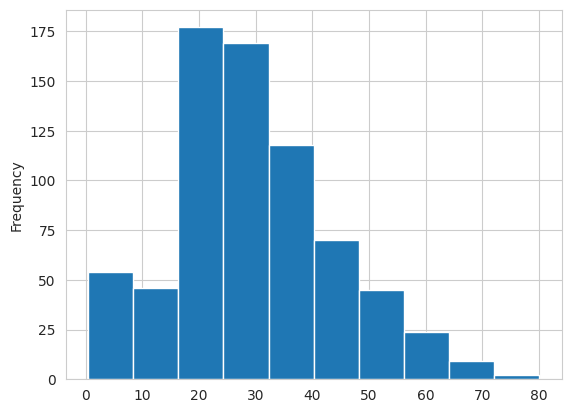

In [ ]:
train['Age'].plot.hist()

<Axes: ylabel='Frequency'>

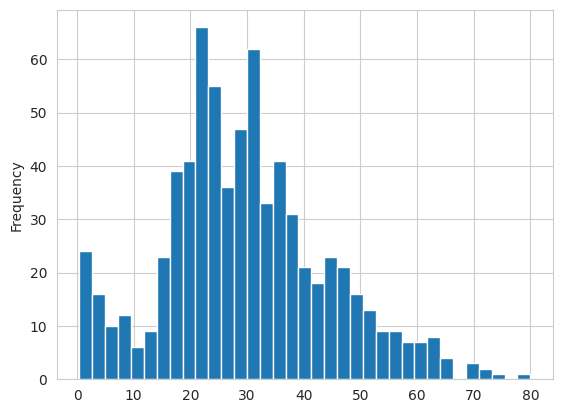

In [ ]:
train['Age'].plot.hist(bins=35)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-25-816621878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='Paired')


<Axes: xlabel='SibSp', ylabel='count'>

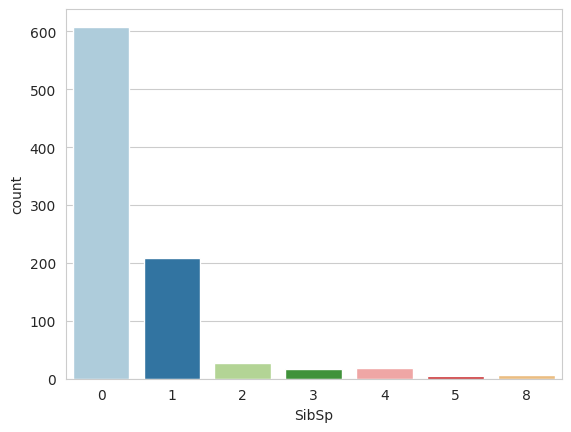

In [ ]:
#to count the number of Siblings/spouses
sns.countplot(x='SibSp',data=train,palette='Paired')

<Axes: ylabel='Frequency'>

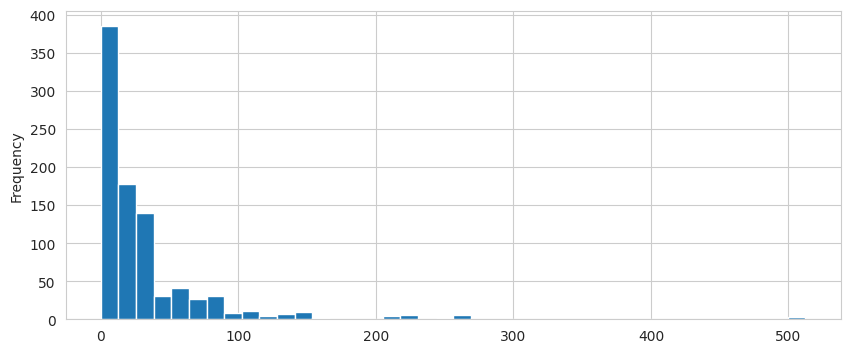

In [ ]:
#to see how much people paid
train['Fare'].plot.hist(bins=40,figsize=(10,4))

In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

**Logistic Regression-Part2**

/tmp/ipython-input-37-2559007861.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

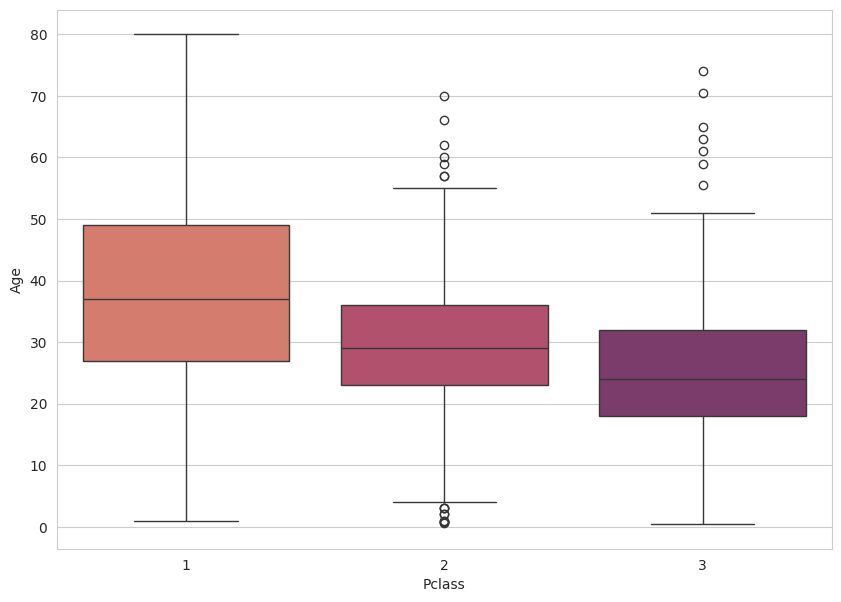

In [ ]:
#check the average age by passenger class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='flare')

In [3]:
def impute_age(cols):
  Age=cols[0]
  Pclass= cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [9]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipython-input-3-876698514.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/tmp/ipython-input-3-876698514.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass= cols[1]


<Axes: >

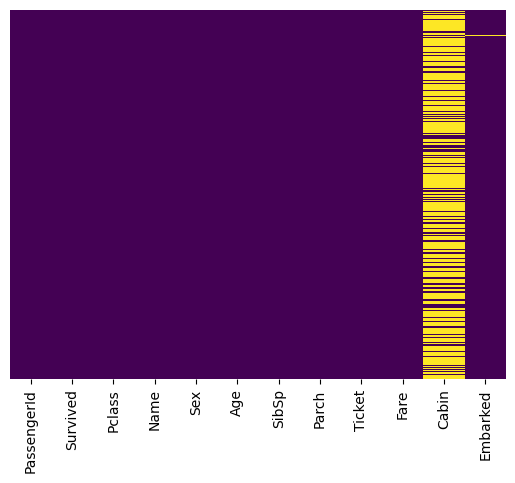

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#now we see that there is no missing value in Age

In [ ]:
#too much missing information in Cabin... so just drop the Cabin column
#axis controls whether you are using rows or columns.. axis=0..rows, axis=1..columns
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

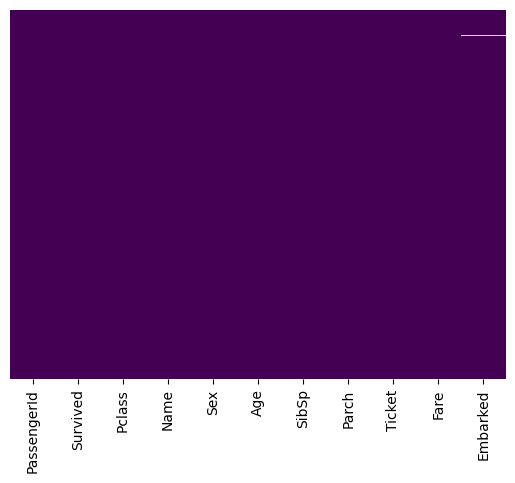

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
#to drop all the other missing values
train.dropna(inplace=True)

<Axes: >

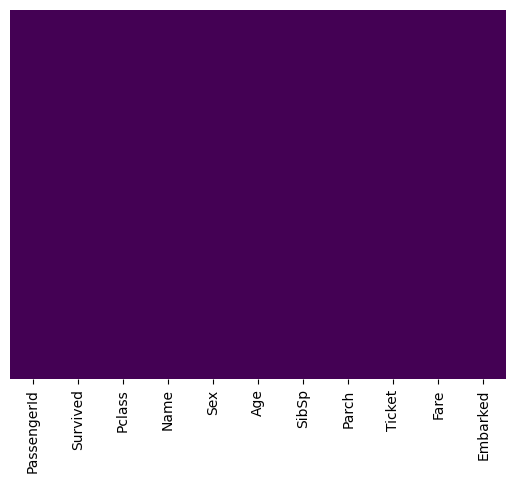

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#no missing data.. we have successfully cleaned the data

In [23]:
#in train dataset, Sex is denoted by using male or female.. which will be difficult for machine learning algorithms to process
#so we need to convert the sex values into 0/1..same for 'Embarked' column

In [27]:
pd.get_dummies(train['Sex'],drop_first=True)
#we dropped female column bcos if female=0 , then male=1 and vice versa..
#so 1 column will be perfect predictor of another column and henc will mess up the whole data
#multicollinearity issue

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [28]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [29]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [36]:
embark= pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [38]:
train=pd.concat([train,sex,embark],axis=1)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [42]:
#drop the columns we are not gonna use
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,True,False,True
887,888,1,1,19.0,0,0,30.00,False,False,True
888,889,0,3,24.0,1,2,23.45,False,False,True
889,890,1,1,26.0,0,0,30.00,True,False,False
890,891,0,3,32.0,0,0,7.75,True,True,False


In [50]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')


In [51]:
train.drop('PassengerId',axis=1,inplace=True)

In [52]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,True,False,True
887,1,1,19.0,0,0,30.00,False,False,True
888,0,3,24.0,1,2,23.45,False,False,True
889,1,1,26.0,0,0,30.00,True,False,False
890,0,3,32.0,0,0,7.75,True,True,False


**Logistic Regression-Part 3**

In [53]:
#y indicates the column you are trying to predict
X=train.drop('Survived',axis=1)
y=train['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
#test_size is 30% while the training dataset is remaining 70%

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel=LogisticRegression(max_iter=1000)

In [61]:
logmodel.fit(X_train,y_train)
#learn patterns from all passengers data(X_train) and associate them with whether each of them survived or not(y_train)

LogisticRegression(max_iter=1000)

In [63]:
predictions= logmodel.predict(X_test)
#trained model makes predictions on new,unseen data
#y_test contains the data whether to check whether these predictions where true or not

In [64]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))
# 0 indicates 'did not survive'
#1 indiactes 'survived'

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [67]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test,predictions)

#Confusion matrix:
#[TN FP]   True Negative, False Positive
#[FN TP]   False Negative, True Positive

array([[150,  13],
       [ 32,  72]])